In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('presentation')

In [2]:
# For completed DataFrame's header.
headers = ['theta', 'shear_stress', 'calculated_shear_stress']

# 0 ~ 2pi step by pi/16
degrees = [(2 * np.pi) * d / 32 for d in range(0, 33)]


def extract_data(filepath: str, B1: float = 0.001, beta:float = 50.0) -> pd.DataFrame:
    """Read output file and make dataframe.
    
    Parameters
    ----------
    filepath: str
        File name to read.
    B1: float
        Parameter of simulation
    beta: float
        Parameter of simulation
    
    Returns
    -------
    data: pd.DataFrame
        Organized data set.
    
    Note
    ----
    Duplicate the last data, which is the case of theta is 2pi,
    and insert it as the data of theta is 0. Add new column,
    calculated_shear_stress that contains the calculation data.
    """
    data = pd.read_csv(filepath, header=None, names=['time', 'shear_rate', 'shear_strain', 'shear_stress', 'viscosity'], sep='\s+')
    last_row = data.tail(1)
    data = pd.concat([last_row, data])
    data = data.reset_index(drop=True)
    data['calculated_shear_stress'] = 0.0
    data['theta'] = degrees
    calculate_shear_stress(data, B1, beta)
    data = data[headers]
    
    return data

def calculate_shear_stress(data: pd.DataFrame, B1: float = 0.001, beta: float = 50.0) -> None:
    """Calculate theoretical value.
    
    Parameters
    ----------
    data: pd.DataFrame
        Data frame contains 'shear_stress'. 
    B1: float
        Parameter of simulation.
    beta: float
        Parameter of simulation.
    """
    
    B2 = B1 * beta
    
    mu = 1.0
    a  = 5
    Nx = 2**6
    Ny = 2**7
    Nz = 2**6
    V = Nx * Ny * Nz

    data['calculated_shear_stress'] = 4 * np.pi * mu * (a ** 2) * B2 * np.sin(degrees) * np.cos(degrees) / V

shear_rate      = 0.0
janus_slip_vel  = 0.001
janus_slip_mode = 50.0
fix_cell        = ON


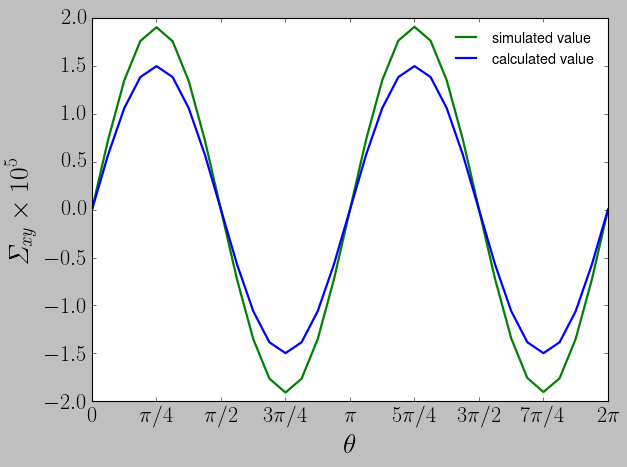

In [9]:
"""sim02"""
print('shear_rate      = 0.0')
print('janus_slip_vel  = 0.001')
print('janus_slip_mode = 50.0')
print('fix_cell        = ON')

data_sim02 = extract_data('sim02/all_data.txt', B1=0.001, beta=50.0)

xticks = [d * 2 * np.pi / 8 for d in range(0, 9)]
xticks_str = ['$0$', '$\pi/4$', '$\pi/2$', '$3\pi/4$', '$\pi$', '$5\pi/4$', '$3\pi/2$', '$7\pi/4$', '$2\pi$']

plt.xticks(xticks, xticks_str, fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(-2.0, 2.0)
plt.xlabel(r'$\it{\theta}$', fontsize=25)
plt.ylabel(r'$\it{\Sigma_{xy}}\times\rm{10^5}$', fontsize=25)

plt.plot(degrees, data_sim02['shear_stress'] * 10 ** 5, color='green', label='simulated value')
plt.plot(degrees, data_sim02['calculated_shear_stress'] * 10 ** 5, color='blue', label='calculated value')

plt.legend(ncol=1, fontsize=13)
plt.tight_layout()
plt.savefig('pics/sim02.pdf')